In [3]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile,isdir, join
path = "C:/Users/Dell/Desktop/EEG Arithmetic/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-during-mental-arithmetic-tasks-1.0.0/"

In [2]:
import pyedflib  #European Data Format 
# It is a simple and flexible format for exchange and storage of multichannel biological and physical signals.

#with “_1” postfix -- the recording of the background EEG of a subject (before mental arithmetic task)
#with “_2” postfix -- the recording of EEG during the mental arithmetic task. 

In [29]:
onlyfiles = [d for d in listdir(path) if isfile(join(path, d))] 
onlyfiles = [i for i in onlyfiles if '.edf' in i]
print(onlyfiles[0] + "    " + onlyfiles[1])

Subject00_1.edf    Subject00_2.edf


In [43]:
f = pyedflib.EdfReader(path+onlyfiles[1])
n = f.signals_in_file      #number of channels = 21 (20 EEG channels, 1 ECG)
signal_labels = f.getSignalLabels()   #name if the channels
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

In [44]:
len(sigbufs[10])

31000

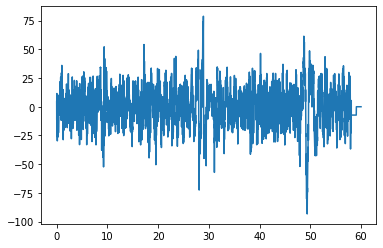

In [46]:
from matplotlib import pyplot as plt
from PyEMD import EMD

t = np.linspace(0,60,31000)
plt.plot(t,sigbufs[0]) #plotting the first EEG channel signal (1 min)

In [47]:
IMF = EMD().emd(sigbufs[0],t)
N = IMF.shape[0]+1

# Plot results
plt.figure(figsize=(20,20))
plt.subplot(N,1,1)
plt.plot(t, sigbufs[0], 'r')
plt.title("Input signal:")
plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
    #imp_features = second_order_difference_plot(imf,n+1,channel,dirc_,imp_features,trial)

plt.tight_layout()
plt.savefig('arith.png')
plt.close()

In [25]:
#Group “G” (24 subjects) performing good quality count (Mean number of operations per 4 minutes = 21, SD = 7.4 ), 
#Group ”B” (12 subjects) performing bad quality count (Mean number of operations per 4 minutes = 7, SD = 3.6).  
#In the file “subjects_info.xlsx” the “Count quality” column provides info which subjects correspond to which group 
#(0 - Group ”B”, 1 - Group “G”). 

subject_info = pd.read_csv(path+"subject-info.csv")
subject_info.head()

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
